#Requirements

In [1]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 56.3 MB/s eta 0:00:00


In [51]:
import multiprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statistics import mean

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag

from gensim.models import Word2Vec

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('tagsets')
nltk.download('tagsets_json')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package tagsets_json to /root/nltk_data...
[nltk_data]   Package tagsets_json is already up-to-date!


True

#Data

Yelp Review Sentiment Dataset

In [44]:
data = pd.read_csv('train_en.txt', sep='\t' )

In [45]:
data

,Sentence,Style,User
0,Cute interior and owner (?) gave us tour of up...,positive,bcjbaE6dDog4jkNY91ncLQ
1,I've been to this location many times when I l...,negative,enaHB1e956thdnafcHVAig
2,My food only merited maybe two stars but I wil...,negative,07aVWNhBhpwqW3MdqoKDKQ
3,After trying a few ramen places with crazy var...,negative,OkjeFppodgJP_CvB84cJYw
4,I cannot even believe someone gave this place ...,positive,7Ie0VmQtnGYUVq2YW4dTVw
...,...,...,...
342900,So I've belonged to a gym for YEARS and I fina...,positive,O5y7KlfBdqV6Ih8yhjZLsg
342901,"ice cream! ice cream sodas, sundaes!! \n\nwant...",positive,7ziWZULyiZv2TesYNMFf4g
342902,This is a good pizza option - they deliver thr...,negative,MCzlzlOw7IGbRAKVjJBPtg
342903,Don't misinterpret my 5-star review....I don't...,positive,x1QLCwZGFAjxRRw4EHc3-g


Tokenized each sentence in the Sentence column into a list of words and stored it in the Tokens column.

In [46]:
data['Tokens'] = data['Sentence'].apply(lambda s: word_tokenize(s))

# Exercise 1

Trained a **Skip-gram** Word2Vec model on the tokenized text to learn 100-dimensional embeddings for words appearing at least 15 times.

In [47]:
sentences = data['Tokens'].values.tolist()

In [48]:
skipgram_model = Word2Vec(sentences, vector_size=100, window=3, min_count=15, sg=1, workers=multiprocessing.cpu_count())

Applied t-SNE to reduce the first 50 word vectors to 2D and plotted them to visualize semantic relationships.
Each point in the scatter plot is annotated with the corresponding word to observe clusters of related terms.

In [49]:
words = skipgram_model.wv.index_to_key

word_vectors = skipgram_model.wv.vectors
reducer = TSNE(n_components=2)

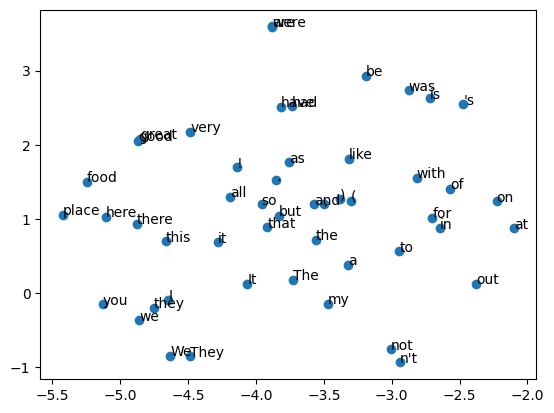

In [38]:
word_vectors_2d = reducer.fit_transform(word_vectors[:50])

plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])
for label, x, y in zip(words[:50], word_vectors_2d[:, 0], word_vectors_2d[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()

In [39]:
print("Paris – France + Italy")
print(skipgram_model.wv.most_similar(positive=['Paris', 'Italy'], negative=['France'])[0])

Paris – France + Italy
('NYC', 0.647738516330719)


In [40]:
print("Madrid – Spain + France")
print(skipgram_model.wv.most_similar(positive=['Madrid', 'France'], negative=['Spain'])[0])

Madrid – Spain + France
('L.A.', 0.665017306804657)


In [41]:
print("King – Man + Woman")
print(skipgram_model.wv.most_similar(positive=['King', 'Woman'], negative=['Man'])[0])

King – Man + Woman
('Women', 0.5533682107925415)


In [42]:
print("Bigger – Big + Cold")
print(skipgram_model.wv.most_similar(positive=['Bigger', 'Cold'], negative=['Big'])[0])

Bigger – Big + Cold
('Pricier', 0.5631227493286133)


In [43]:
print("Windows – Microsoft + Google")
print(skipgram_model.wv.most_similar(positive=['Windows', 'Google'], negative=['Microsoft'])[0])

Windows – Microsoft + Google
('Ins', 0.5270482897758484)


**CBOW** Word2Vec model

In [44]:
cbow_model = Word2Vec(sentences, vector_size=100, window=3, min_count=15, sg=0, workers=multiprocessing.cpu_count())

In [45]:
words_cbow = cbow_model.wv.index_to_key

word_vectors_cbow = cbow_model.wv.vectors
reducer_cbow = TSNE(n_components=2)

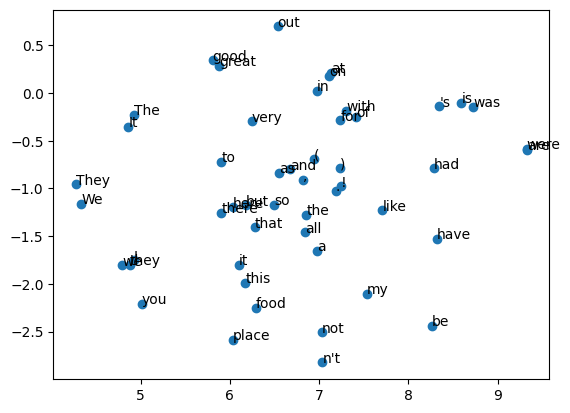

In [47]:
word_vectors_2d_cbow = reducer_cbow.fit_transform(word_vectors_cbow[:50])

plt.scatter(word_vectors_2d_cbow[:, 0], word_vectors_2d_cbow[:, 1])
for label, x, y in zip(words_cbow[:50], word_vectors_2d_cbow[:, 0], word_vectors_2d_cbow[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()

In [49]:
print("Paris – France + Italy")
print(cbow_model.wv.most_similar(positive=['Paris', 'Italy'], negative=['France'])[0])

print("Madrid – Spain + France")
print(cbow_model.wv.most_similar(positive=['Madrid', 'France'], negative=['Spain'])[0])

print("King – Man + Woman")
print(cbow_model.wv.most_similar(positive=['King', 'Woman'], negative=['Man'])[0])

print("Bigger – Big + Cold")
print(cbow_model.wv.most_similar(positive=['Bigger', 'Cold'], negative=['Big'])[0])

print("Windows – Microsoft + Google")
print(cbow_model.wv.most_similar(positive=['Windows', 'Google'], negative=['Microsoft'])[0])

Paris – France + Italy
('NYC', 0.6842130422592163)
Madrid – Spain + France
('Toronto', 0.7014750838279724)
King – Man + Woman
('Salvation', 0.6171483397483826)
Bigger – Big + Cold
('weaker', 0.662763237953186)
Windows – Microsoft + Google
('google', 0.6265063881874084)


experimenting with the **vector_size** - dimensionality of the word vectors

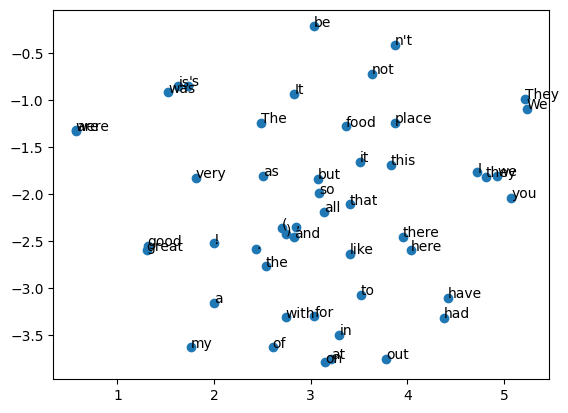

In [50]:
skipgram_model_vs50 = Word2Vec(sentences, vector_size=50, window=3, min_count=15, sg=1, workers=multiprocessing.cpu_count())

words_vs50 = skipgram_model_vs50.wv.index_to_key
word_vectors_vs50 = skipgram_model_vs50.wv.vectors
reducer_vs50 = TSNE(n_components=2)

word_vectors_2d_vs50 = reducer.fit_transform(word_vectors_vs50[:50])

plt.scatter(word_vectors_2d_vs50[:, 0], word_vectors_2d_vs50[:, 1])
for label, x, y in zip(words_vs50[:50], word_vectors_2d_vs50[:, 0], word_vectors_2d_vs50[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()

In [52]:
print("Paris – France + Italy")
print(skipgram_model_vs50.wv.most_similar(positive=['Paris', 'Italy'], negative=['France'])[0])

print("Madrid – Spain + France")
print(skipgram_model_vs50.wv.most_similar(positive=['Madrid', 'France'], negative=['Spain'])[0])

print("King – Man + Woman")
print(skipgram_model_vs50.wv.most_similar(positive=['King', 'Woman'], negative=['Man'])[0])

print("Bigger – Big + Cold")
print(skipgram_model_vs50.wv.most_similar(positive=['Bigger', 'Cold'], negative=['Big'])[0])

print("Windows – Microsoft + Google")
print(skipgram_model_vs50.wv.most_similar(positive=['Windows', 'Google'], negative=['Microsoft'])[0])

Paris – France + Italy
('Brooklyn', 0.7311367988586426)
Madrid – Spain + France
('Scottsdale', 0.8354358673095703)
King – Man + Woman
('Bashas', 0.7054211497306824)
Bigger – Big + Cold
('Pricier', 0.6778204441070557)
Windows – Microsoft + Google
('Dives', 0.6421510577201843)


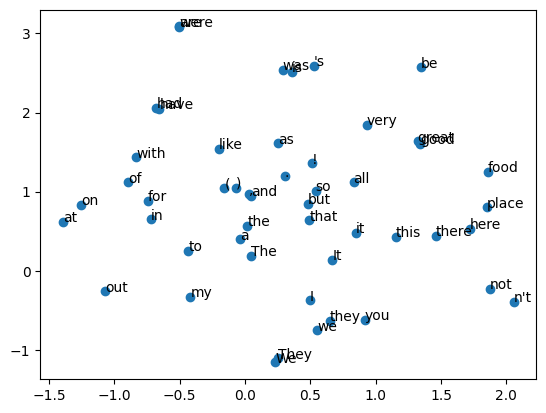

In [51]:
skipgram_model_vs150 = Word2Vec(sentences, vector_size=150, window=3, min_count=15, sg=1, workers=multiprocessing.cpu_count())

words_vs150 = skipgram_model_vs50.wv.index_to_key
word_vectors_vs150 = skipgram_model_vs150.wv.vectors
reducer_vs150 = TSNE(n_components=2)

word_vectors_2d_vs150 = reducer.fit_transform(word_vectors_vs150[:50])

plt.scatter(word_vectors_2d_vs150[:, 0], word_vectors_2d_vs150[:, 1])
for label, x, y in zip(words_vs150[:50], word_vectors_2d_vs150[:, 0], word_vectors_2d_vs150[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()

In [53]:
print("Paris – France + Italy")
print(skipgram_model_vs150.wv.most_similar(positive=['Paris', 'Italy'], negative=['France'])[0])

print("Madrid – Spain + France")
print(skipgram_model_vs150.wv.most_similar(positive=['Madrid', 'France'], negative=['Spain'])[0])

print("King – Man + Woman")
print(skipgram_model_vs150.wv.most_similar(positive=['King', 'Woman'], negative=['Man'])[0])

print("Bigger – Big + Cold")
print(skipgram_model_vs150.wv.most_similar(positive=['Bigger', 'Cold'], negative=['Big'])[0])

print("Windows – Microsoft + Google")
print(skipgram_model_vs150.wv.most_similar(positive=['Windows', 'Google'], negative=['Microsoft'])[0])

Paris – France + Italy
('NYC', 0.5623206496238708)
Madrid – Spain + France
('Morocco', 0.6727594137191772)
King – Man + Woman
('Mattress', 0.533653736114502)
Bigger – Big + Cold
('Pricier', 0.5794200897216797)
Windows – Microsoft + Google
('click', 0.47401171922683716)


there isn't any significant difference

#Exercise 2

In [74]:
pad_token = "<PAD>"
unk_token = "<UNK>"
vocab = [pad_token, unk_token] + words

In [75]:
embedding_matrix = np.zeros((len(vocab), 100))
embedding_matrix[2:] = word_vectors

In [76]:
word_to_id = {word: i for i, word in enumerate(vocab)}

In [77]:
data["Token IDs"] = data["Tokens"].apply(
    lambda tokens: [word_to_id[w] if w in word_to_id else word_to_id[unk_token]
                    for w in tokens]
)

tokens_list = data['Token IDs'].values

In [78]:
avg_len = int(mean([len(t) for t in data["Token IDs"]]))
padded_sentences = np.array(pad_sequences(tokens_list, maxlen=avg_len))

In [79]:
labels = np.array([1 if label=='positive' else 0 for label in data['Style']])

In [80]:
model = Sequential()
model.add(Embedding(input_dim=len(vocab), output_dim=100,
                    weights=[embedding_matrix], input_length=avg_len, trainable=True))
model.add(LSTM(128))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=["accuracy"])

In [81]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │     3,337,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,337,300 (12.73 MB)

 Trainable params: 3,337,300 (12.73 MB)

 Non-trainable params: 0 (0.00 B)

In [82]:
history = model.fit(padded_sentences, labels, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
8573/8573 ━━━━━━━━━━━━━━━━━━━━ 1804s 210ms/step - accuracy: 0.7736 - loss: 0.4852 - val_accuracy: 0.8396 - val_loss: 0.3661
Epoch 2/5
8573/8573 ━━━━━━━━━━━━━━━━━━━━ 1818s 212ms/step - accuracy: 0.8471 - loss: 0.3543 - val_accuracy: 0.8491 - val_loss: 0.3656
Epoch 3/5
8573/8573 ━━━━━━━━━━━━━━━━━━━━ 1813s 211ms/step - accuracy: 0.8545 - loss: 0.3400 - val_accuracy: 0.8436 - val_loss: 0.3481
Epoch 4/5
8573/8573 ━━━━━━━━━━━━━━━━━━━━ 1821s 212ms/step - accuracy: 0.8596 - loss: 0.3289 - val_accuracy: 0.8675 - val_loss: 0.3172
Epoch 5/5
8573/8573 ━━━━━━━━━━━━━━━━━━━━ 1842s 215ms/step - accuracy: 0.8652 - loss: 0.3192 - val_accuracy: 0.8668 - val_loss: 0.3203


In [85]:
test_df = pd.read_csv('test_en.txt', sep='\t' )

In [86]:
test_df

,Sentence,Style,User
0,The hubby and I have been here on multiple occ...,positive,j2wlzrntrbKwyOcOiB3l3w
1,Meh is all I can say for TDS. The restaurant i...,negative,kHmXUEOAsIbguUrPoX6Tkg
2,I stopped in because I was hungry for some sna...,positive,gasLVm0KRwrVhPGRcqATjw
3,Here's an update for my further Comcast experi...,negative,RycuS3TlPJKYCN6jaqgc7w
4,My wife bought a car here. I handled the nego...,negative,NfoAmvEZ3NVTAtOEshCvwQ
...,...,...,...
42859,I'm writing this review because I think Fergie...,positive,0dxR_Q8PCOOWNkfpvI4t3w
42860,Yes! I am a fan of the First Watch restaurants...,positive,7bvU6GkGa8fLF0f6wSjIMQ
42861,I was fortunate enough to get served an ad to ...,positive,TK_bfkEq72MWMuOxd7eCtA
42862,"alright, i can't pretend to be a hipster anymo...",positive,suRoi6fJjOSdzBMWzaZ5sQ


In [89]:
test_df['Tokens'] = test_df['Sentence'].apply(lambda s: word_tokenize(s))
test_df["Token IDs"] = test_df["Tokens"].apply(
    lambda tokens: [word_to_id[w] if w in word_to_id else word_to_id[unk_token]
                    for w in tokens]
)

X_test = np.array(pad_sequences(test_df['Token IDs'].values, maxlen=avg_len))
y_test = np.array([1 if label=='positive' else 0 for label in test_df['Style']])

In [90]:
pred = (model.predict(X_test) > 0.5).astype("int")

acc = accuracy_score(y_test, pred)
prec = precision_score(y_test, pred)
rec = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

1340/1340 ━━━━━━━━━━━━━━━━━━━━ 92s 68ms/step


In [91]:
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1:", f1)

Accuracy: 0.8657614781634938
Precision: 0.8815017479860161
Recall: 0.9398437753216867
F1: 0.9097383447323838
